In [62]:
import pandas as pd
import sklearn.cluster as cluster
import numpy as np
from matplotlib import pyplot as plt
import pyproj
from scipy.stats import pearsonr
from shapely import geometry
from descartes import PolygonPatch
import datetime 
import time 
import matplotlib.ticker as ticker
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

c1="#a2d7d8"
c2="#bfe1bf"
c3="#ededea"
c4="#fcd059"
c5="#de5842"

crs_from = pyproj.Proj(init='EPSG:4326')
crs_to = pyproj.Proj(init='EPSG:2154')

my_dpi=92

# Concentration des dechets

In [2]:
dechets=pd.read_csv('dataset/dans-ma-rue.csv',sep=';')

In [3]:
dechets=dechets[dechets['ANNEE DECLARATION']==2018]
dechets.head()
dechets['TYPE'].unique()

array(['Objets abandonnés', 'Graffitis, tags, affiches et autocollants',
       'Propreté', 'Arbres, végétaux et animaux',
       'Voirie et déplacements',
       'Mobiliers urbains dégradés (arrachés, cassés, tordus, bancals, en panne... )',
       'Eau et assainissement', 'Éclairage / Électricité',
       'Problème sur un chantier', 'Prospectus frauduleux'], dtype=object)

In [4]:
geoloc=dechets.geo_point_2d.str.split(',', expand=True)
dechets['lat']=geoloc[0]
dechets['lon']=geoloc[1]

dechets.head()

,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEE DECLARATION,MOIS DECLARATION,NUMERO,PREFIXE,INTERVENANT,CONSEIL DE QUARTIER,OBJECTID,geo_shape,geo_point_2d,lat,lon
0,Objets abandonnés,Objets entrant dans plusieurs catégories,"10 Rue des Vignoles, 75020 PARIS",75020,Paris 20,20.0,2018-05-26T04:00:00+02:00,2018,5,15575.0,A,Ramen en tant que prestataire de DansMaRue,PERE LACHAISE - REUNION,187930,"{""type"": ""Point"", ""coordinates"": [2.3981637949...","48.8532999991, 2.39816379495",48.8532999991,2.39816379495
1,"Graffitis, tags, affiches et autocollants",Affiches et autocollants sur autres supports:A...,"124 Rue Petit, 75019 PARIS",75019,Paris 19,19.0,2018-05-26T04:00:00+02:00,2018,5,15731.0,G,graffitis,MANIN - JAURES,187945,"{""type"": ""Point"", ""coordinates"": [2.3936829935...","48.8865299978, 2.39368299353",48.8865299978,2.39368299353
4,Objets abandonnés,Meubles et éléments de décoration,"8 Rue de l'Orme, 75019 PARIS",75019,Paris 19,19.0,2018-05-27T04:00:00+02:00,2018,5,16228.0,G,Ramen en tant que prestataire de DansMaRue,PORTE DES LILAS,187967,"{""type"": ""Point"", ""coordinates"": [2.4004399978...","48.8781699949, 2.40043999782",48.8781699949,2.40043999782
5,"Graffitis, tags, affiches et autocollants","Graffitis sur immeuble, mur ou commerce","55 rue Marcadet, 75018 PARIS",75018,Paris 18,18.0,2018-05-28T04:00:00+02:00,2018,5,16584.0,S,graffitis,GOUTTE D'OR - CHATEAU ROUGE,187976,"{""type"": ""Point"", ""coordinates"": [2.3500862029...","48.8904699982, 2.35008620291",48.8904699982,2.35008620291
6,"Graffitis, tags, affiches et autocollants",Affiches ou autocollants sur trottoir et ouvra...,"46 Passage Com AA13, 75013 PARIS",75013,Paris 13,13.0,2018-05-28T04:00:00+02:00,2018,5,16420.0,G,DPE,PATAY - MASSENA,187978,"{""type"": ""Point"", ""coordinates"": [2.3697489964...","48.8254279999, 2.36974899648",48.8254279999,2.36974899648


In [64]:
lat = dechets["lat"].tolist()
lon = dechets["lon"].tolist()
a = []
b = []

for i in range(len(lat)):
    t = pyproj.transform(crs_from, crs_to, lon[i], lat[i])
    a.append(t[0] / 1000)
    b.append(t[1] / 1000)

dechets["x"] = np.array(a)
dechets["y"] = np.array(b)

dechets.head()

,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEE DECLARATION,MOIS DECLARATION,NUMERO,PREFIXE,INTERVENANT,CONSEIL DE QUARTIER,OBJECTID,geo_shape,geo_point_2d,lat,lon,x,y
0,Objets abandonnés,Objets entrant dans plusieurs catégories,"10 Rue des Vignoles, 75020 PARIS",75020,Paris 20,20.0,2018-05-26T04:00:00+02:00,2018,5,15575.0,A,Ramen en tant que prestataire de DansMaRue,PERE LACHAISE - REUNION,187930,"{""type"": ""Point"", ""coordinates"": [2.3981637949...","48.8532999991, 2.39816379495",48.8532999991,2.39816379495,655.838656,6861.641641
1,"Graffitis, tags, affiches et autocollants",Affiches et autocollants sur autres supports:A...,"124 Rue Petit, 75019 PARIS",75019,Paris 19,19.0,2018-05-26T04:00:00+02:00,2018,5,15731.0,G,graffitis,MANIN - JAURES,187945,"{""type"": ""Point"", ""coordinates"": [2.3936829935...","48.8865299978, 2.39368299353",48.8865299978,2.39368299353,655.538244,6865.339102
4,Objets abandonnés,Meubles et éléments de décoration,"8 Rue de l'Orme, 75019 PARIS",75019,Paris 19,19.0,2018-05-27T04:00:00+02:00,2018,5,16228.0,G,Ramen en tant que prestataire de DansMaRue,PORTE DES LILAS,187967,"{""type"": ""Point"", ""coordinates"": [2.4004399978...","48.8781699949, 2.40043999782",48.8781699949,2.40043999782,656.026673,6864.405733
5,"Graffitis, tags, affiches et autocollants","Graffitis sur immeuble, mur ou commerce","55 rue Marcadet, 75018 PARIS",75018,Paris 18,18.0,2018-05-28T04:00:00+02:00,2018,5,16584.0,S,graffitis,GOUTTE D'OR - CHATEAU ROUGE,187976,"{""type"": ""Point"", ""coordinates"": [2.3500862029...","48.8904699982, 2.35008620291",48.8904699982,2.35008620291,652.344929,6865.802639
6,"Graffitis, tags, affiches et autocollants",Affiches ou autocollants sur trottoir et ouvra...,"46 Passage Com AA13, 75013 PARIS",75013,Paris 13,13.0,2018-05-28T04:00:00+02:00,2018,5,16420.0,G,DPE,PATAY - MASSENA,187978,"{""type"": ""Point"", ""coordinates"": [2.3697489964...","48.8254279999, 2.36974899648",48.8254279999,2.36974899648,653.728951,6858.558827


(642.3062845792701, 661.6160704195305, 6857.032389848446, 6867.535094941598)

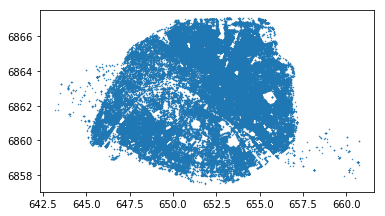

In [65]:
plt.close()
plt.figure()
plt.scatter(a,b,s = 0.2)
plt.axis('scaled')

In [7]:
import ast

In [8]:
arr=pd.read_csv('dataset/arrondissements.csv',sep=';')
coordinates = pd.DataFrame(columns=['coords'])
for (i,r) in arr.iterrows():
    e = ast.literal_eval(r['Geometry'])
    coordinates.loc[i] = e['coordinates']

coordinates['Arrondissement']=arr.L_AR
coordinates.head()

,coords,Arrondissement
0,"[[2.351518483670821, 48.8644258050741], [2.350...",2ème Ardt
1,"[[2.363828096062925, 48.86750443060333], [2.36...",3ème Ardt
2,"[[2.413879624300607, 48.83357143972265], [2.41...",12ème Ardt
3,"[[2.328007329038849, 48.86991742140715], [2.32...",1er Ardt
4,"[[2.368512371393433, 48.85573412813671], [2.36...",4ème Ardt


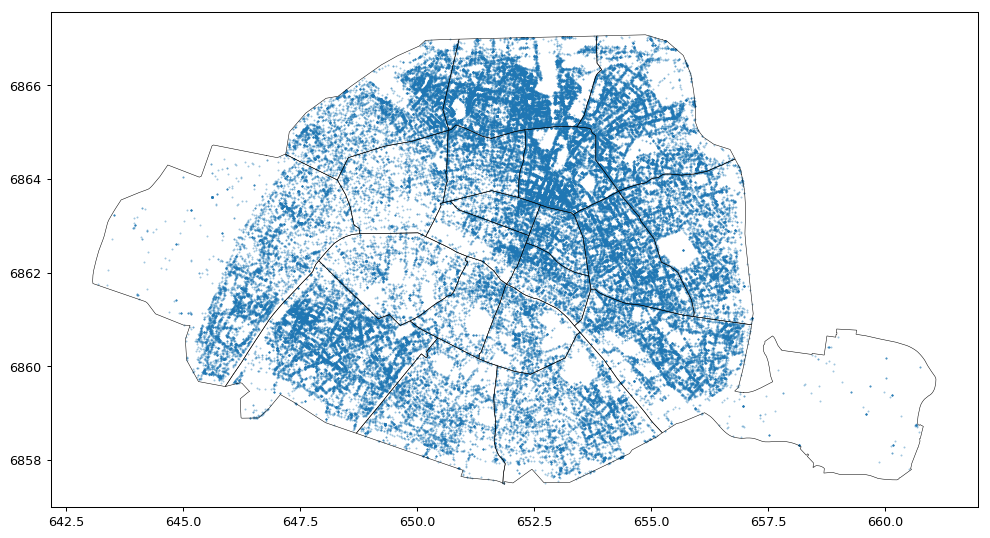

In [66]:
plt.close()
poly= []
for index,row in coordinates.iterrows():
    final_coords = []
    for c in row.coords:
        (x, y) = pyproj.transform(crs_from, crs_to, c[0], c[1])
        final_coords.append([x/1000, y/1000])
    poly.append(geometry.Polygon(final_coords))
fig, ax = plt.subplots(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
for p in poly:
    x, y = p.exterior.xy
    ax.plot(x, y, color="k", linewidth=0.4)
ax.scatter(a, b, s = 0.2, alpha=0.5)
plt.axis('scaled')
plt.tight_layout()
plt.savefig('type_zone.png')

# Clustering avec HDBSCAN

In [67]:
import hdbscan

In [88]:
dechets_coord=dechets[['x','y']]
dechets_coord.head()

,x,y
0,655.838656,6861.641641
1,655.538244,6865.339102
4,656.026673,6864.405733
5,652.344929,6865.802639
6,653.728951,6858.558827


### Grid search réalisé sur le min_cluster_size

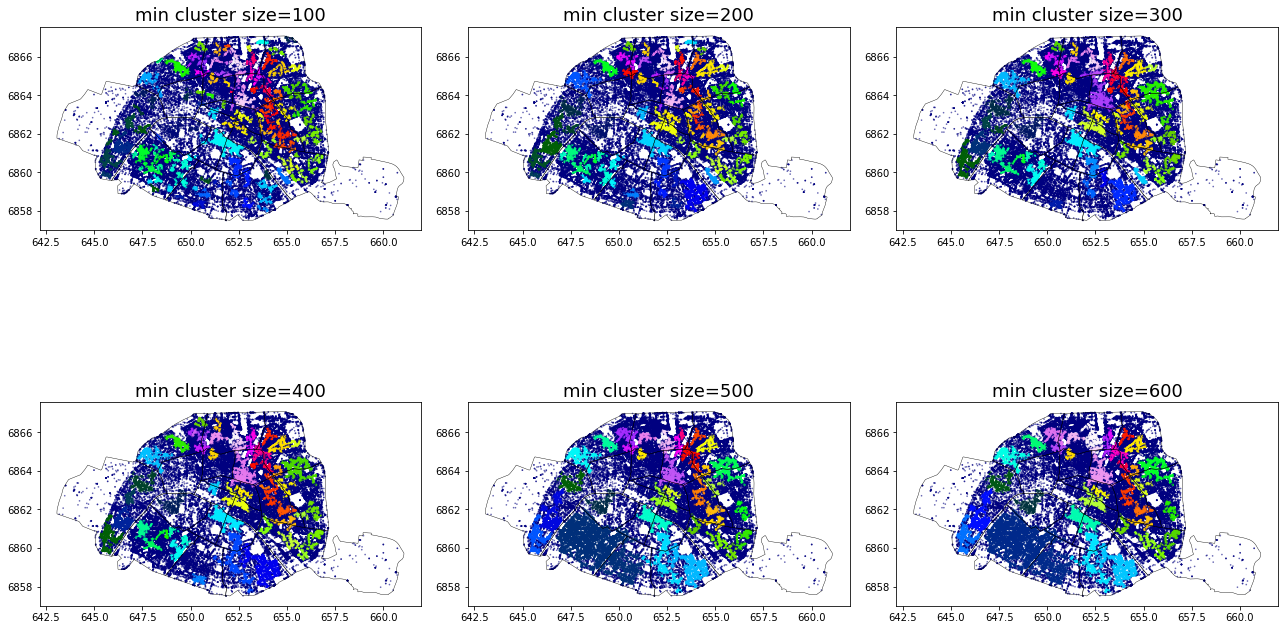

In [89]:
range_min_cluster_size = [100,200,300,400,500,600]
n = len(range_min_cluster_size)//3

fig, ax = plt.subplots(n,3, figsize=(18, 6*n))

for i, min_cluster_size in enumerate(range_min_cluster_size):
    clstr_hdbscan = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,min_samples=30)
    clstr_hdbscan.fit(dechets_coord)
    for p in poly:
        x, y = p.exterior.xy
        ax[i//3][i%3].plot(x, y, color="k", linewidth=0.4)
    ax[i//3][i%3].scatter(dechets_coord.x, dechets_coord.y, c=clstr_hdbscan.labels_, alpha=0.5, s = 0.5,cmap='gist_ncar')
    ax[i//3][i%3].set_title("min cluster size=" + str(min_cluster_size), size=18)
    ax[i//3][i%3].set_aspect('equal')
plt.tight_layout()

### Grid search sur le min_samples
On choisi la valeur min_cluster_size=200

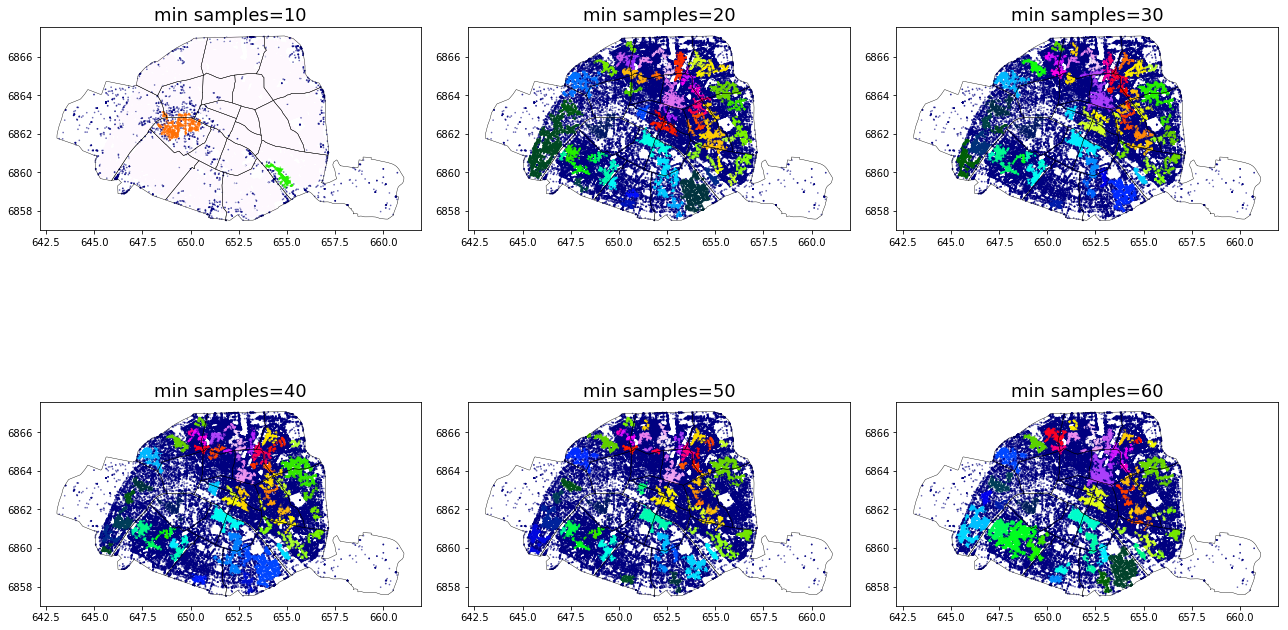

In [90]:
range_min_samples = [10,20,30,40,50,60]
n = len(range_min_samples)//3

fig, ax = plt.subplots(n,3, figsize=(18, 6*n))

for i, min_samples in enumerate(range_min_samples):
    clstr_hdbscan = hdbscan.HDBSCAN(min_cluster_size=300,min_samples=min_samples)
    clstr_hdbscan.fit(dechets_coord)
    for p in poly:
        x, y = p.exterior.xy
        ax[i//3][i%3].plot(x, y, color="k", linewidth=0.4)
    ax[i//3][i%3].scatter(dechets_coord.x, dechets_coord.y, c=clstr_hdbscan.labels_, alpha=0.5, s = 0.5,cmap='gist_ncar')
    ax[i//3][i%3].set_title("min samples=" + str(min_samples), size=18)
    ax[i//3][i%3].set_aspect('equal')
plt.tight_layout()

### La configuration finale choisie est min samples=30 et min cluster size = 300

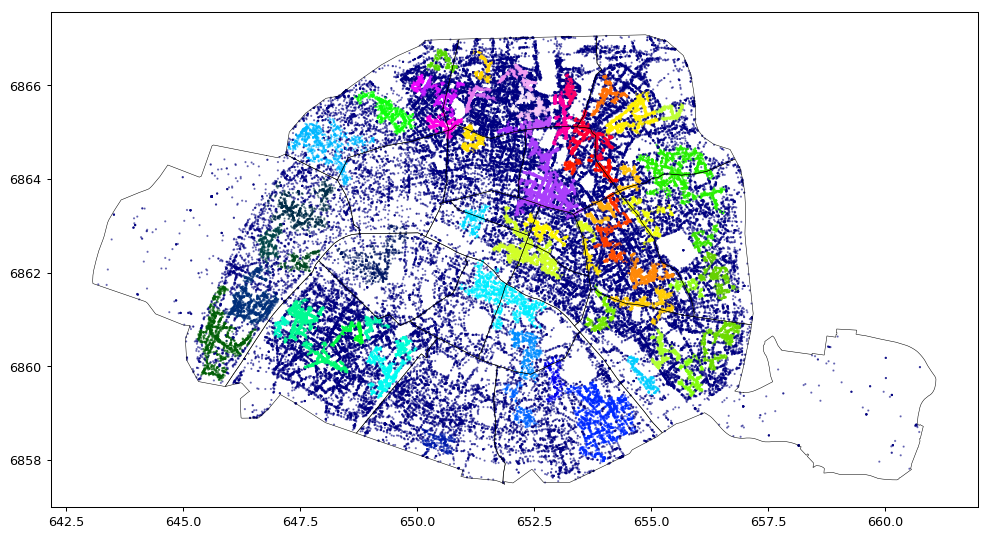

In [92]:
plt.close()
poly= []
for index,row in coordinates.iterrows():
    final_coords = []
    for c in row.coords:
        (x, y) = pyproj.transform(crs_from, crs_to, c[0], c[1])
        final_coords.append([x/1000, y/1000])
    poly.append(geometry.Polygon(final_coords))
fig, ax = plt.subplots(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
for p in poly:
    x, y = p.exterior.xy
    ax.plot(x, y, color="k", linewidth=0.4)


clstr_hdbscan = hdbscan.HDBSCAN(min_cluster_size=300,min_samples=30)
clstr_hdbscan.fit(dechets_coord)
ax.scatter(dechets_coord.x, dechets_coord.y, c=clstr_hdbscan.labels_, alpha=0.5, s = 0.5,cmap="gist_ncar")
plt.axis('scaled')
plt.tight_layout()
plt.savefig('HDBCluster.png')

In [93]:
pd.Series(pd.Series(clstr_hdbscan.labels_).unique())

0     32
1     35
2     24
3     72
4      8
5     17
6     49
7     -1
8     43
9      3
10    20
11    41
12    48
13    14
14    38
15    10
16    61
17    15
18    13
19    36
20    33
21    23
22    51
23    19
24    18
25    58
26    27
27    34
28     5
29    50
      ..
46    16
47    22
48    69
49    68
50    46
51    21
52    44
53    71
54    40
55    66
56    47
57    59
58     4
59    64
60    39
61    37
62    56
63    54
64    70
65    31
66    29
67    74
68     6
69    30
70    12
71     9
72    62
73    73
74    65
75     7
Length: 76, dtype: int64

hdbscan pour trouver des zones puis frequence de sinistre par zone ?